In [3]:
import pandas as pd

In [25]:
!pip install sklearn.ensemble

ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


In [5]:
train =pd.read_csv('titanic_train.csv')

In [10]:
train.head()

,PassengerId,Surved,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.isnull()

,PassengerId,Surved,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
import seaborn as sns

In [14]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\Roopal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 292.8/292.8 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 12.1 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 727.0 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 11.6 MB/s eta 0:00:00
     -------------------------------------- 930.9/930.9 KB 3.5 MB/s eta 0:00:00


<AxesSubplot:>

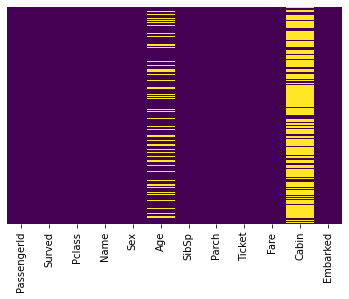

In [19]:
sns.heatmap(train.isnull(), yticklabels = False,cmap='viridis',cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

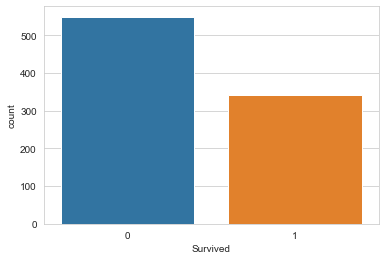

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

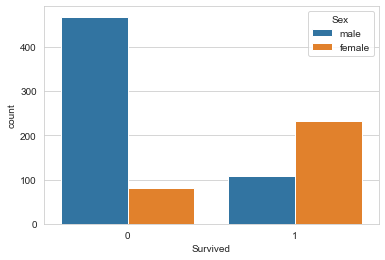

In [28]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

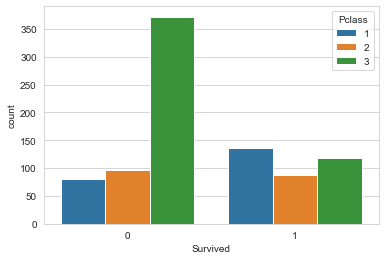

In [29]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age'>

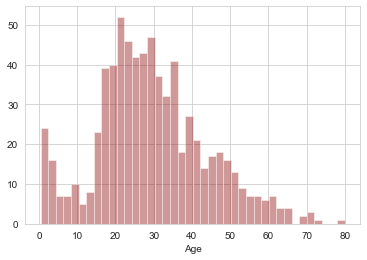

In [34]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40 , color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

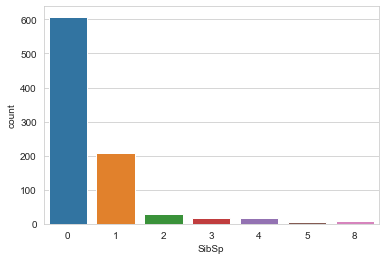

In [35]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

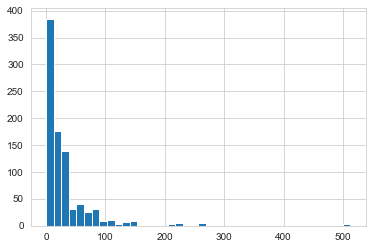

In [36]:
train['Fare'].hist(bins=40)

In [38]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

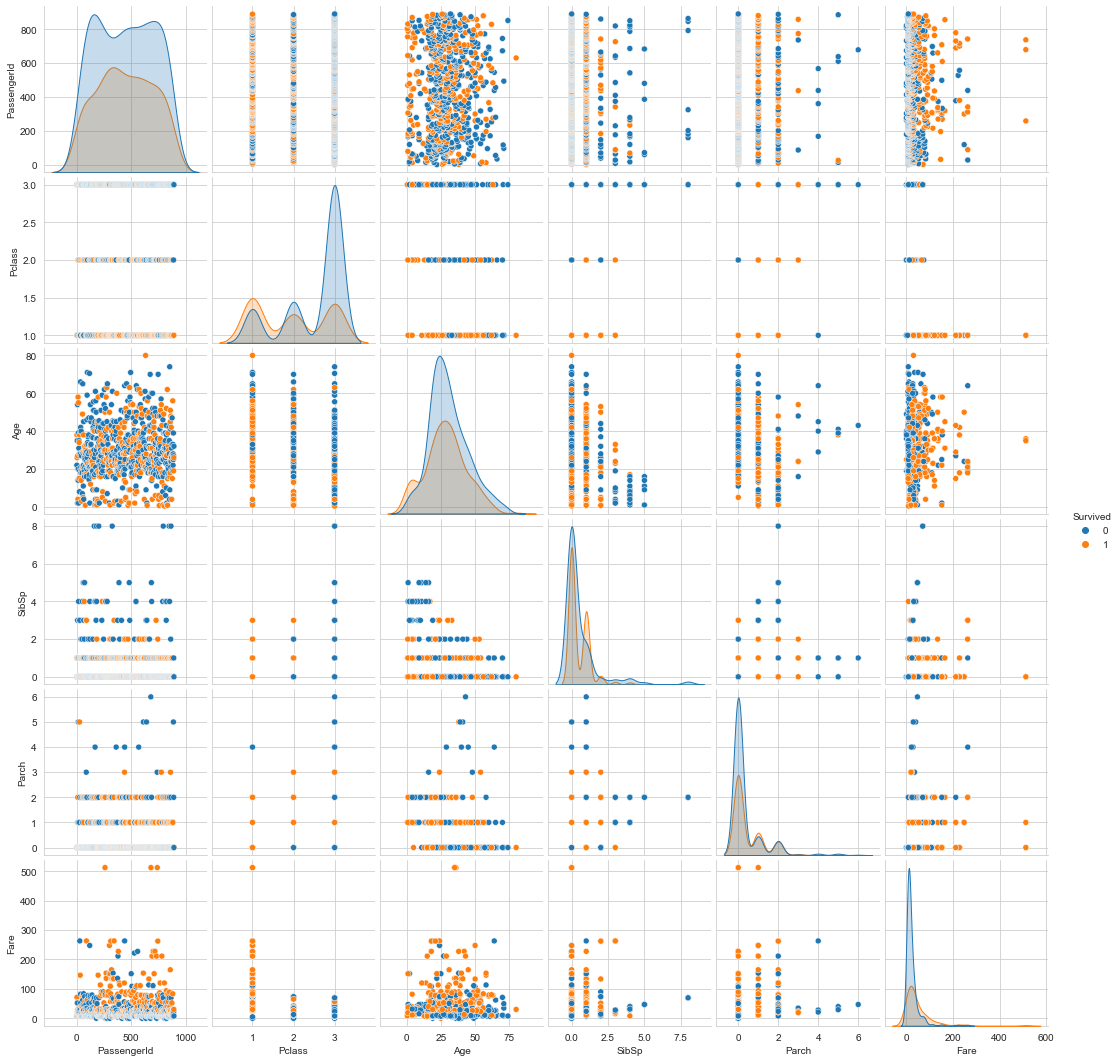

In [39]:
sns.pairplot(train, hue='Survived')

In [40]:
!pip  install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 12.8 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 2.4 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\Roopal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Roopal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [50]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

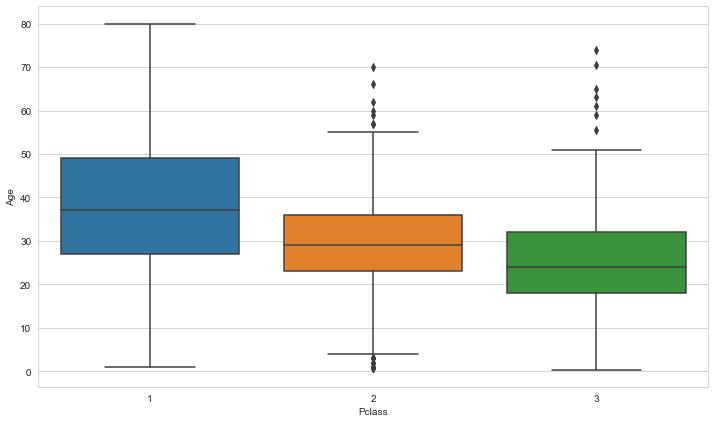

In [51]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [7]:
def impute_age(cols):
    age =cols[0]
    Pclass =cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            age = 37
        if Pclass == 2:
            age = 29
        if Pclass == 3:
            age  = 24
    return age

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

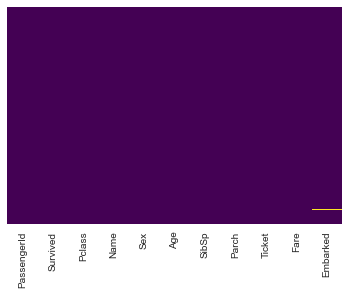

In [60]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [9]:
train.drop('Cabin', axis=1, inplace=True)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [13]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [14]:
train.drop(['Sex', 'Embarked','Name','Ticket'], axis=1, inplace=True)

In [15]:
train = pd.concat([train, sex,embark], axis= 1)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size = 0.3, random_state=101)

In [80]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [19]:
X_test.shape

(268, 9)

In [82]:
X_train.shape

(623, 9)

In [83]:
y_train.shape

(623,)

In [20]:
from sklearn.linear_model import LogisticRegression 

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Roopal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
prediction = logmodel.predict(X_test)

In [23]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
accuracy = confusion_matrix(y_test, prediction)

In [93]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y_test, prediction)

In [97]:
accuracy

0.7686567164179104

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
str_data = StandardScaler()

In [32]:
standardized_train=str_data.fit_transform(X_train)

In [33]:
standardized_test=str_data.transform(X_test)

In [34]:
standardized_train[:2,:]

array([[ 0.28384553, -1.59418307,  0.08582773, -0.49131049, -0.48432517,
         1.39097165, -1.35821532, -0.30177525,  0.62003584],
       [ 0.24500613,  0.81936748,  0.00903846, -0.49131049, -0.48432517,
        -0.52170584,  0.73626029,  3.31372437, -1.61280999]])

In [35]:
standardized_test[:2,:]

array([[-0.45021903, -1.59418307,  1.27606151, -0.49131049, -0.48432517,
        -0.05887134,  0.73626029, -0.30177525,  0.62003584],
       [ 0.98295463, -1.59418307, -0.83564358,  0.38073064, -0.48432517,
         4.38043638, -1.35821532, -0.30177525, -1.61280999]])

In [36]:
standardized_train = pd.DataFrame(standardized_train, columns = X_train.columns)
standardized_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.283846,-1.594183,0.085828,-0.49131,-0.484325,1.390972,-1.358215,-0.301775,0.620036
1,0.245006,0.819367,0.009038,-0.49131,-0.484325,-0.521706,0.736260,3.313724,-1.612810
2,-0.003566,-0.387408,-1.219590,-0.49131,0.722613,-0.259619,-1.358215,-0.301775,0.620036
3,-1.728035,0.819367,-0.221329,-0.49131,-0.484325,-0.517802,-1.358215,-0.301775,0.620036
4,0.947999,0.819367,-1.910693,-0.49131,0.722613,-0.395309,-1.358215,-0.301775,-1.612810
